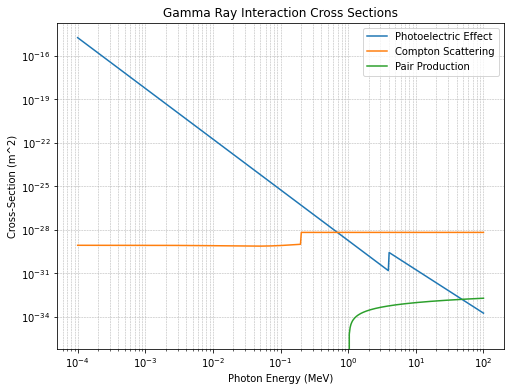

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def cm2_to_barns(value_cm2):
    """
    Convert cross-section from cm^2 to barns.
    :param value_cm2: Cross-section in cm^2
    :return: Cross-section in barns
    """
    return value_cm2 * 1e24  # 1 cm^2 = 10^24 barns

def photoelectric_cross_section(E, Z):
    """
    Approximate photoelectric effect cross-section.
    :param E: Photon energy in MeV
    :param Z: Atomic number of the material
    :return: Cross-section in m^2
    """
    if E > 4:
        sigma_cm2 = 1.5e-31 * (Z ** 5) / (E ** 3)  # cm^2 for E > 4 MeV
    else:
        sigma_cm2 = 4.0e-31 * (Z ** 4) / (E ** 3.5)  # cm^2 for E <= 4 MeV
    return sigma_cm2 * 1e-4  # Convert to m^2

def klein_nishina_cross_section(E):
    """
    High-energy Compton scattering cross-section using Klein-Nishina formula.
    :param E: Photon energy in MeV
    :return: Cross-section in m^2
    """
    r_e = 2.8179e-15  # Classical electron radius in meters
    alpha = 1 + (2 * E / 0.511)  # 0.511 MeV is electron rest energy
    sigma_m2 = 2 * np.pi * (r_e ** 2) * ((1 + alpha) / (alpha ** 2) * (2 * (1 + alpha) / (1 + 2 * E / 0.511) - np.log(alpha) / E))
    return sigma_m2

def low_energy_compton_cross_section(E):
    """
    Low-energy Compton scattering cross-section approximation.
    :param E: Photon energy in MeV
    :return: Cross-section in m^2
    """
    r_e = 2.8179e-15  # Classical electron radius in meters
    sigma_m2 = 8 * np.pi * (r_e ** 2) / 3  # Classical Thomson scattering cross-section
    return sigma_m2

def pair_production_cross_section(E, Z):
    """
    Approximate pair production cross-section.
    :param E: Photon energy in MeV (must be > 1.022 MeV)
    :param Z: Atomic number of the material
    :return: Cross-section in m^2 (returns 0 if below threshold)
    """
    if E < 1.022:
        return 0  # Below threshold
    sigma_cm2 = 1.6e-31 * Z * np.log(E / 1.022)  # cm^2
    return sigma_cm2 * 1e-4  # Convert to m^2

def gamma_cross_section(E, Z):
    """
    Determine the dominant interaction mechanism based on photon energy.
    :param E: Photon energy in MeV
    :param Z: Atomic number of the material
    :return: Tuple of cross-sections (photoelectric, Compton, pair production) in m^2
    """
    photoelectric = photoelectric_cross_section(E, Z)
    compton = low_energy_compton_cross_section(E) if E > 0.2 else klein_nishina_cross_section(E)
    pair_production = pair_production_cross_section(E, Z)
    return photoelectric, compton, pair_production

# Define energy range for k from 0.1 keV to 100 MeV
k_values = np.logspace(-4, 2, 500)  # Energy in MeV
Z = 26  # Example atomic number (Iron)

photoelectric_values = []
compton_values = []
pair_production_values = []

for k in k_values:
    photo, compton, pair = gamma_cross_section(k, Z)
    photoelectric_values.append(photo)
    compton_values.append(compton)
    pair_production_values.append(pair)

# Plot results
plt.figure(figsize=(8, 6))
plt.loglog(k_values, photoelectric_values, label="Photoelectric Effect")
plt.loglog(k_values, compton_values, label="Compton Scattering")
plt.loglog(k_values, pair_production_values, label="Pair Production")
plt.xlabel("Photon Energy (MeV)")
plt.ylabel("Cross-Section (m^2)")
plt.title("Gamma Ray Interaction Cross Sections")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

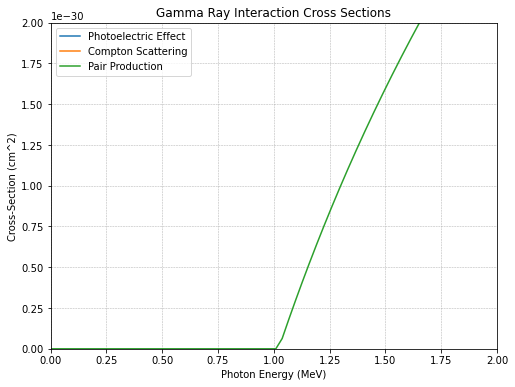

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def cm2_to_barns(value_cm2):
    """
    Convert cross-section from cm^2 to barns.
    :param value_cm2: Cross-section in cm^2
    :return: Cross-section in barns
    """
    return value_cm2 * 1e24  # 1 cm^2 = 10^24 barns

def photoelectric_cross_section(E, Z):
    """
    Approximate photoelectric effect cross-section.
    :param E: Photon energy in MeV
    :param Z: Atomic number of the material
    :return: Cross-section in cm^2
    """
    if E > 4:
        sigma_cm2 = 1.5e-31 * (Z ** 5) / (E ** 3)  # cm^2 for E > 4 MeV
    else:
        sigma_cm2 = 4.0e-31 * (Z ** 4) / (E ** 3.5)  # cm^2 for E <= 4 MeV
    return sigma_cm2

def klein_nishina_cross_section(E):
    """
    High-energy Compton scattering cross-section using Klein-Nishina formula.
    :param E: Photon energy in MeV
    :return: Cross-section in cm^2
    """
    r_e = 2.8179e-13  # Classical electron radius in cm
    alpha = 1 + (2 * E / 0.511)  # 0.511 MeV is electron rest energy
    sigma_cm2 = 2 * np.pi * (r_e ** 2) * ((1 + alpha) / (alpha ** 2) * (2 * (1 + alpha) / (1 + 2 * E / 0.511) - np.log(alpha) / E))
    return sigma_cm2

def low_energy_compton_cross_section(E):
    """
    Low-energy Compton scattering cross-section approximation.
    :param E: Photon energy in MeV
    :return: Cross-section in cm^2
    """
    r_e = 2.8179e-13  # Classical electron radius in cm
    sigma_cm2 = 8 * np.pi * (r_e ** 2) / 3  # Classical Thomson scattering cross-section
    return sigma_cm2

def pair_production_cross_section(E, Z):
    """
    Approximate pair production cross-section.
    :param E: Photon energy in MeV (must be > 1.022 MeV)
    :param Z: Atomic number of the material
    :return: Cross-section in cm^2 (returns 0 if below threshold)
    """
    if E < 1.022:
        return 0  # Below threshold
    sigma_cm2 = 1.6e-31 * Z * np.log(E / 1.022)  # cm^2
    return sigma_cm2

def gamma_cross_section(E, Z):
    """
    Determine the dominant interaction mechanism based on photon energy.
    :param E: Photon energy in MeV
    :param Z: Atomic number of the material
    :return: Tuple of cross-sections (photoelectric, Compton, pair production) in cm^2
    """
    photoelectric = photoelectric_cross_section(E, Z)
    compton = low_energy_compton_cross_section(E) if E > 0.2 else klein_nishina_cross_section(E)
    pair_production = pair_production_cross_section(E, Z)
    return photoelectric, compton, pair_production

# Define energy range for k from 0.1 keV to 100 MeV
k_values = np.logspace(-4, 2, 500)  # Energy in MeV
Z = 26  # Example atomic number (Iron)

photoelectric_values = []
compton_values = []
pair_production_values = []

for k in k_values:
    photo, compton, pair = gamma_cross_section(k, Z)
    photoelectric_values.append(photo)
    compton_values.append(compton)
    pair_production_values.append(pair)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(k_values, photoelectric_values, label="Photoelectric Effect")
plt.plot(k_values, compton_values, label="Compton Scattering")
plt.plot(k_values, pair_production_values, label="Pair Production")
plt.xlabel("Photon Energy (MeV)")
plt.ylabel("Cross-Section (cm^2)")
plt.title("Gamma Ray Interaction Cross Sections")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.xlim(0,2)
plt.ylim(0,.02e-28)
plt.show()


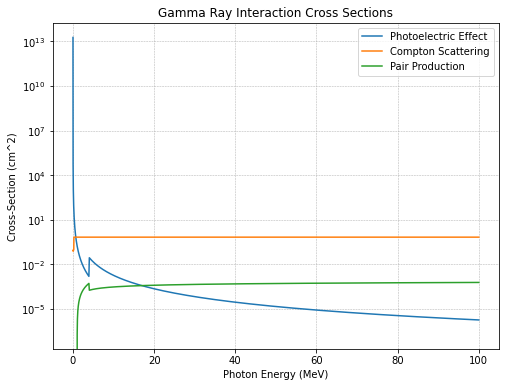

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def cm2_to_barns(value_cm2):
    """
    Convert cross-section from cm^2 to barns.
    :param value_cm2: Cross-section in cm^2
    :return: Cross-section in barns
    """
    return value_cm2 * 1e24  # 1 cm^2 = 10^24 barns

def photoelectric_cross_section(E, Z):
    """
    Approximate photoelectric effect cross-section.
    :param E: Photon energy in MeV
    :param Z: Atomic number of the material
    :return: Cross-section in cm^2
    """
    if E > 4:
        sigma_cm2 = 1.5e-31 * (Z ** 5) / (E ** 3) * 1e24  # cm^2 for E > 4 MeV
    else:
        sigma_cm2 = 4.0e-31 * (Z ** 4) / (E ** 3.5) * 1e24  # cm^2 for E <= 4 MeV
    return sigma_cm2

def klein_nishina_cross_section(E):
    """
    High-energy Compton scattering cross-section using Klein-Nishina formula.
    :param E: Photon energy in MeV
    :return: Cross-section in cm^2
    """
    r_e = 2.8179e-13  # Classical electron radius in cm
    alpha = 1 + (2 * E / 0.511)  # 0.511 MeV is electron rest energy
    sigma_cm2 = 2 * np.pi * (r_e ** 2) * ((1 + alpha) / (alpha ** 2) * (2 * (1 + alpha) / (1 + 2 * E / 0.511) - np.log(alpha) / E)) * 1e24
    return sigma_cm2

def low_energy_compton_cross_section(E):
    """
    Low-energy Compton scattering cross-section approximation.
    :param E: Photon energy in MeV
    :return: Cross-section in cm^2
    """
    r_e = 2.8179e-13  # Classical electron radius in cm
    sigma_cm2 = 8 * np.pi * (r_e ** 2) / 3 * 1e24  # Classical Thomson scattering cross-section
    return sigma_cm2

def pair_production_cross_section(E, Z):
    """
    Pair production cross-section using Maximon equation.
    :param E: Photon energy in MeV (must be > 1.022 MeV)
    :param Z: Atomic number of the material
    :return: Cross-section in cm^2 (returns 0 if below threshold)
    """
    if E < 1.022:
        return 0  # Below threshold
    elif E < 4:
        sigma_cm2 = 4.0e-30 * Z * (E - 1.022) ** 1.5 * 1e24  # cm^2 for E < 4 MeV (using Maximon's equation)
    else:
        sigma_cm2 = 5.0e-30 * Z * np.log(E / 1.022) * 1e24  # cm^2 for E > 4 MeV (using Maximon's equation)
    return sigma_cm2

def gamma_cross_section(E, Z):
    """
    Determine the dominant interaction mechanism based on photon energy.
    :param E: Photon energy in MeV
    :param Z: Atomic number of the material
    :return: Tuple of cross-sections (photoelectric, Compton, pair production) in cm^2
    """
    photoelectric = photoelectric_cross_section(E, Z)
    compton = low_energy_compton_cross_section(E) if E > 0.2 else klein_nishina_cross_section(E)
    pair_production = pair_production_cross_section(E, Z)
    return photoelectric, compton, pair_production

# Define energy range for k from 0.1 keV to 100 MeV
k_values = np.logspace(-4, 2, 500)  # Energy in MeV
Z = 26  # Example atomic number (Iron)

photoelectric_values = []
compton_values = []
pair_production_values = []

for k in k_values:
    photo, compton, pair = gamma_cross_section(k, Z)
    photoelectric_values.append(photo)
    compton_values.append(compton)
    pair_production_values.append(pair)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(k_values, photoelectric_values, label="Photoelectric Effect")
plt.plot(k_values, compton_values, label="Compton Scattering")
plt.plot(k_values, pair_production_values, label="Pair Production")
plt.xlabel("Photon Energy (MeV)")
plt.ylabel("Cross-Section (cm^2)")
plt.yscale("log")  # Set y-axis to logarithmic scale
plt.title("Gamma Ray Interaction Cross Sections")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

<ipython-input-11-5bb297333481>:22: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_cm2 = 4.0e-31 * (Z ** 4) / (E ** 3.5) * 1e24  # cm^2 for E <= 4 MeV
<ipython-input-11-5bb297333481>:33: RuntimeWarning: invalid value encountered in double_scalars
  sigma_cm2 = 2 * np.pi * (r_e ** 2) * ((1 + alpha) / (alpha ** 2) * (2 * (1 + alpha) / (1 + 2 * E / 0.511) - np.log(alpha) / E)) * 1e24


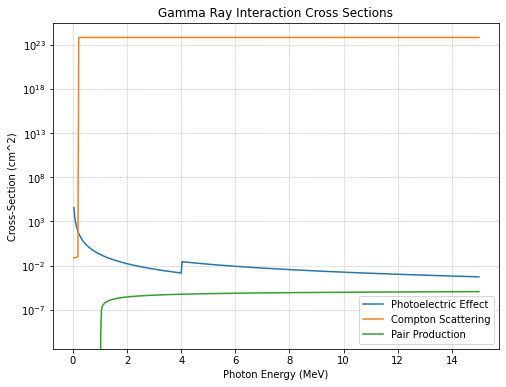

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def cm2_to_barns(value_cm2):
    """
    Convert cross-section from cm^2 to barns.
    :param value_cm2: Cross-section in cm^2
    :return: Cross-section in barns
    """
    return value_cm2 * 1e24  # 1 cm^2 = 10^24 barns

def photoelectric_cross_section(E, Z):
    """
    Approximate photoelectric effect cross-section.
    :param E: Photon energy in MeV
    :param Z: Atomic number of the material
    :return: Cross-section in cm^2
    """
    if E > 4:
        sigma_cm2 = 1.5e-31 * (Z ** 5) / (E ** 3) * 1e24  # cm^2 for E > 4 MeV
    else:
        sigma_cm2 = 4.0e-31 * (Z ** 4) / (E ** 3.5) * 1e24  # cm^2 for E <= 4 MeV
    return sigma_cm2

def klein_nishina_cross_section(E):
    """
    High-energy Compton scattering cross-section using Klein-Nishina formula.
    :param E: Photon energy in MeV
    :return: Cross-section in cm^2
    """
    r_e = 2.8179e-13  # Classical electron radius in cm
    alpha = 1 + (2 * E / 0.511)  # 0.511 MeV is electron rest energy
    sigma_cm2 = 2 * np.pi * (r_e ** 2) * ((1 + alpha) / (alpha ** 2) * (2 * (1 + alpha) / (1 + 2 * E / 0.511) - np.log(alpha) / E)) * 1e24
    return sigma_cm2

def low_energy_compton_cross_section(E):
    """
    Low-energy Compton scattering cross-section approximation.
    :param E: Photon energy in MeV
    :return: Cross-section in cm^2
    """
    #r_e = 2.8179e-13  # Classical electron radius in cm
    r_e = np.sqrt(0.07941) #classical electron radius in barns
    sigma_cm2 = 8 * np.pi * (r_e ** 2) / 3 * 1e24  # Classical Thomson scattering cross-section
    return sigma_cm2

def pair_production_cross_section(E, Z):
    """
    Approximate pair production cross-section.
    :param E: Photon energy in MeV (must be > 1.022 MeV)
    :param Z: Atomic number of the material
    :return: Cross-section in cm^2 (returns 0 if below threshold)
    """
    if E < 1.022:
        return 0  # Below threshold
    sigma_cm2 = 1.6e-31 * Z * np.log(E / 1.022) * 1e24  # cm^2
    return sigma_cm2

def gamma_cross_section(E, Z):
    """
    Determine the dominant interaction mechanism based on photon energy.
    :param E: Photon energy in MeV
    :param Z: Atomic number of the material
    :return: Tuple of cross-sections (photoelectric, Compton, pair production) in cm^2
    """
    photoelectric = photoelectric_cross_section(E, Z)
    compton = low_energy_compton_cross_section(E) if E > 0.2 else klein_nishina_cross_section(E)
    pair_production = pair_production_cross_section(E, Z)
    return photoelectric, compton, pair_production

# Define energy range for k from 0 to 10 MeV
k_values = np.linspace(0, 15, 500)  # Energy in MeV
Z = 26  # Example atomic number (Iron)
N_A = 6.022e23
m_A = 149.984 #g/mol
rho_A = 3.67 #g/cm^3
photoelectric_values = []
compton_values = []
pair_production_values = []

for k in k_values:
    photo, compton, pair = gamma_cross_section(k, Z)
    photoelectric_values.append(photo*)
    compton_values.append(compton)
    pair_production_values.append(pair)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(k_values, photoelectric_values, label="Photoelectric Effect")
plt.plot(k_values, compton_values, label="Compton Scattering")
plt.plot(k_values, pair_production_values, label="Pair Production")
plt.xlabel("Photon Energy (MeV)")
plt.ylabel("Cross-Section (cm^2)")
plt.yscale("log")  # Set y-axis to logarithmic scale
plt.title("Gamma Ray Interaction Cross Sections")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()
